In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [2]:
df = pd.read_csv("Data/energydata.csv")

In [3]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['dayofmonth'] = pd.DatetimeIndex(df['date']).days_in_month
df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek
df['hour'] = pd.DatetimeIndex(df['date']).hour

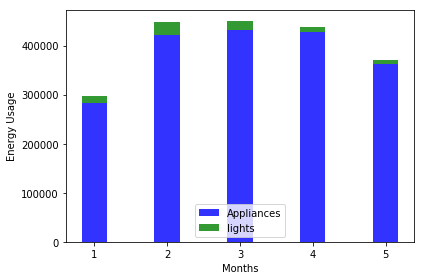

In [4]:
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
ind = range(1,6)
df_groupby_month = (df.groupby(['month']).sum())
rects1 = plt.bar(ind,df_groupby_month['Appliances'], bar_width,
alpha=opacity,
color='b',
label='Appliances')
 
rects2 = plt.bar(ind,df_groupby_month['lights'], bar_width,
alpha=opacity,
color='g',
bottom = df_groupby_month['Appliances'],
label='lights')
 
 
plt.xlabel('Months')
plt.ylabel('Energy Usage')
plt.legend()
 
plt.tight_layout()
plt.show()

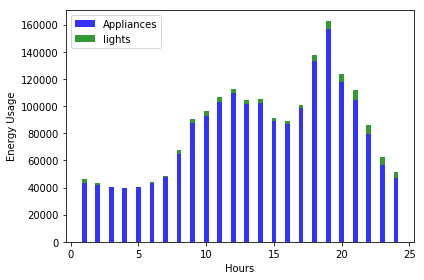

In [5]:
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
ind = range(1,25)
df_groupby_hour = (df.groupby(['hour']).sum())
rects1 = plt.bar(ind,df_groupby_hour['Appliances'], bar_width,
alpha=opacity,
color='b',
label='Appliances')
 
rects2 = plt.bar(ind,df_groupby_hour['lights'], bar_width,
alpha=opacity,
color='g',
bottom = df_groupby_hour['Appliances'],
label='lights')
 
 
plt.xlabel('Hours')
plt.ylabel('Energy Usage')
plt.legend()
 
plt.tight_layout()
plt.show()

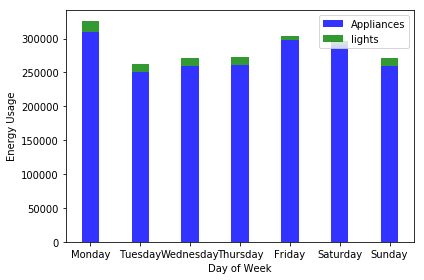

In [6]:
fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.8
ind = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_groupby_daysOfWeek = (df.groupby(['dayofweek']).sum())
rects1 = plt.bar(ind,df_groupby_daysOfWeek['Appliances'], bar_width,
alpha=opacity,
color='b',
label='Appliances')
 
rects2 = plt.bar(ind,df_groupby_daysOfWeek['lights'], bar_width,
alpha=opacity,
color='g',
bottom = df_groupby_daysOfWeek['Appliances'],
label='lights')
 
 
plt.xlabel('Day of Week')
plt.ylabel('Energy Usage')
plt.legend()
 
plt.tight_layout()
plt.show()

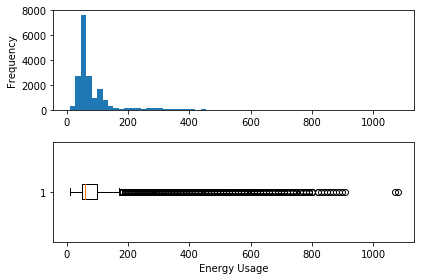

In [7]:
fig = plt.figure()
fig.add_subplot(2,1,1)
plt.hist(df['Appliances'], bins=60)
plt.ylabel('Frequency');

fig.add_subplot(2,1,2)
plt.boxplot(df['Appliances'], vert=False)
plt.xlabel('Energy Usage');
plt.tight_layout()

In [23]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    font_size = abs(corr_r) * 65 + 15
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

C:\Users\walids\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\walids\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


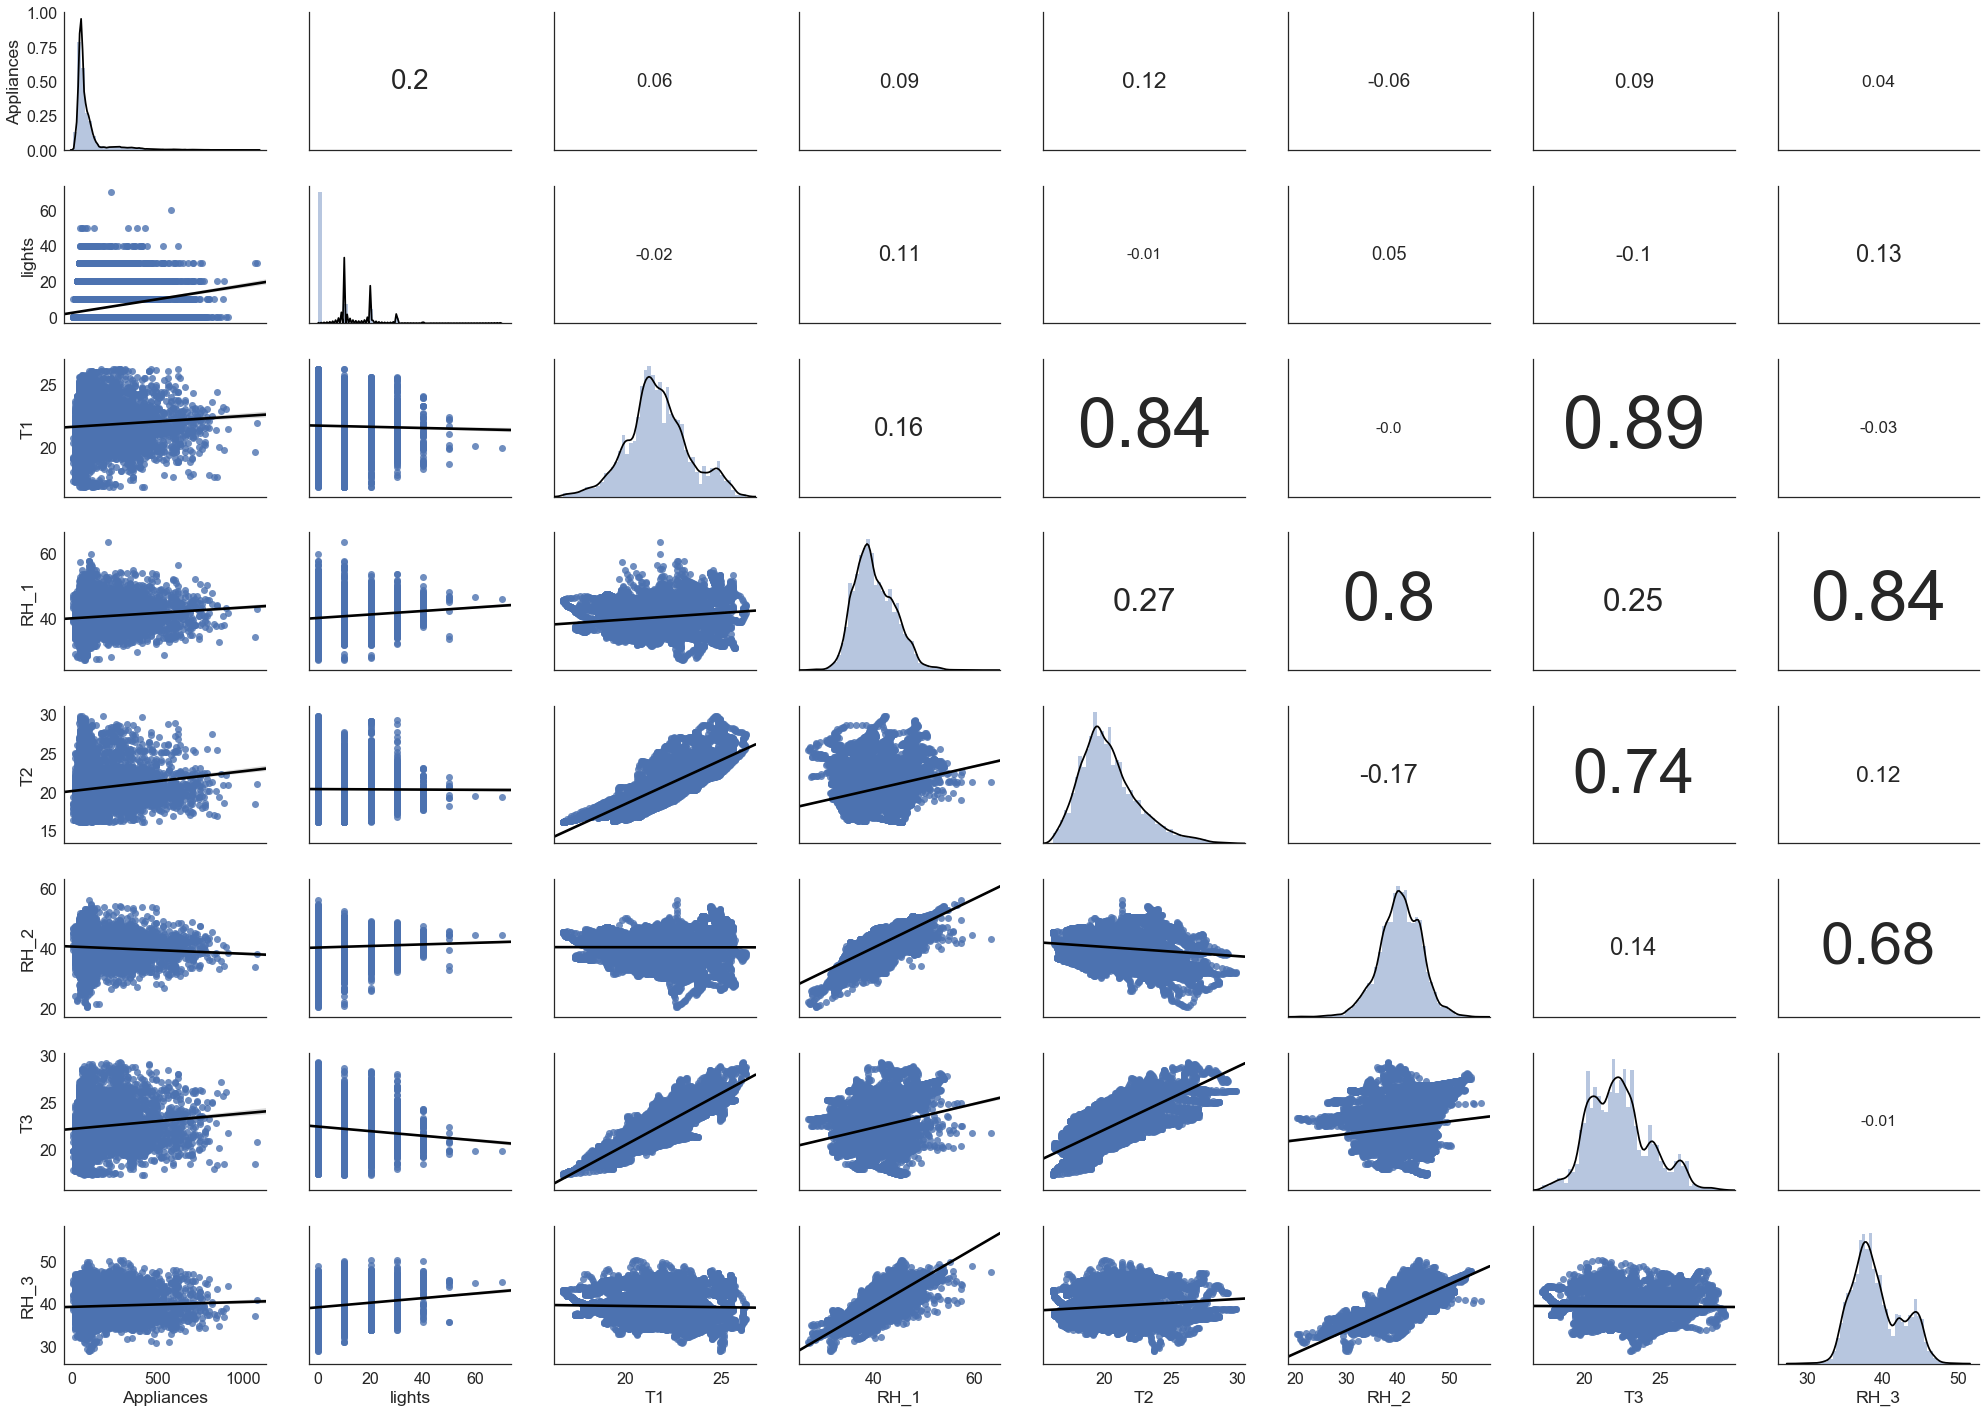

In [26]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, vars=['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3'], aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

We can see many of the featues have high correlations thus next we will choose better features to represent the data more efficently and reduce the compuational complexity.

In [34]:
dfX = df.drop(columns=['date', 'Appliances'])
n_columns = len(dfX.columns)
normalized_dfX=(dfX-dfX.mean())/dfX.std()
pca = PCA(n_components=n_columns)
pca.fit(dfX)

PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

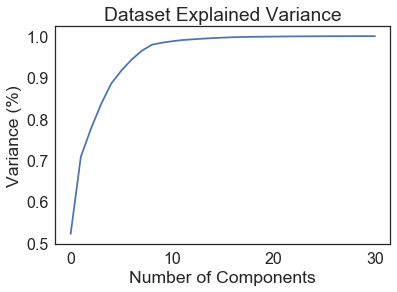

In [40]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

We can easily see that choosing 11 or 12 components of PCA will be enough to describe the data.

In [45]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(dfX)
df_pca = pd.DataFrame(data=X_pca)

In [46]:
print('Original number of features:', len(dfX.columns))
print('Reduced number of features:', len(df_pca.columns))

Original number of features: 31
Reduced number of features: 12
